#**Rain Prediction in Australia Using Classification Algorithms**


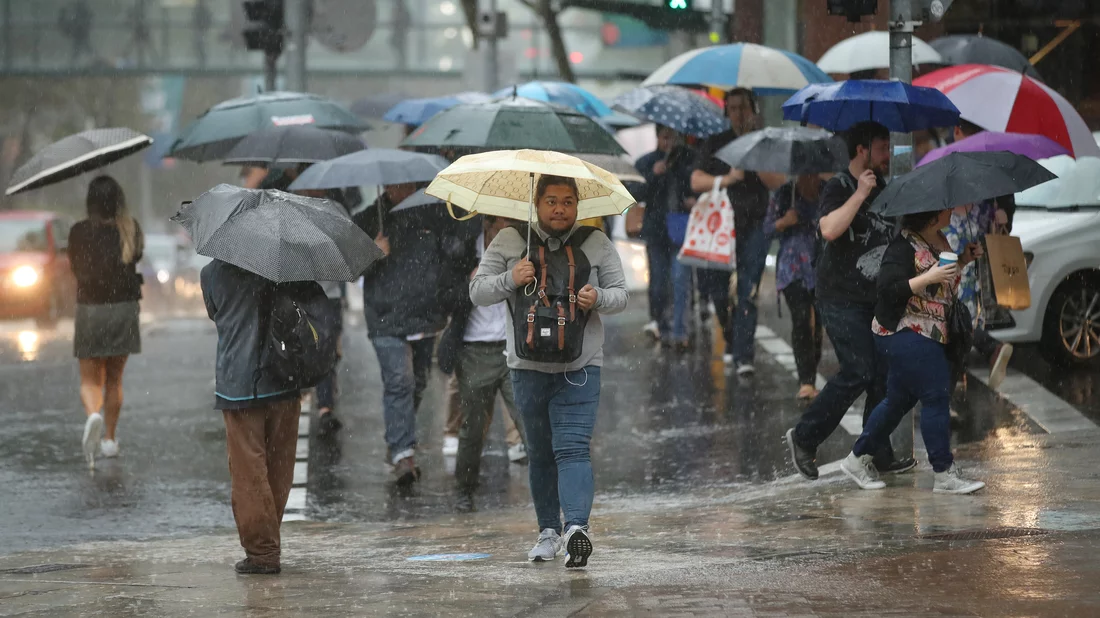

###This assignment was completed as part of IBM Data Science Professional Certificate's Honors Content in Machine Learning with Python Course.

##**Table of Contents**

1. Overview of the process

2. About the Data
    
3. Importing Data
    
4. Data Preprocessing
    
5. One Hot Encoding
    
6. Train and Test Data Split
    
7. Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores


# Overview of the process

We are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using various evaluation metrics.


We will use these algorithms:


1. Linear Regression

2. KNN

3. Decision Trees

4. Logistic Regression

5. SVM

We will evaluate our models using:

1. Accuracy Score

2. Jaccard Index

3. F1-Score

4. LogLoss

5. Mean Absolute Error

6. Mean Squared Error

7. R2-Score

Finally, we will use models to generate the report displaying the accuracy scores.

# About The Dataset


The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)




This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)



## **Import the required libraries**


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

### Importing the Dataset


In [ ]:
#from pyodide.http import pyfetch

#async def download(url, filename):
    #response = await pyfetch(url)
    #if response.status == 200:
        #with open(filename, "wb") as f:
            #f.write(await response.bytes())
from pyodide.http import pyfetch
async def download (url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open (filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

In [ ]:
await download(path, "Weather_Data.csv")
filename ="Weather_Data.csv"

In [ ]:
df = pd.read_csv("Weather_Data.csv")

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [ ]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing


#### One Hot Encoding


First, we need to perform one hot encoding to convert categorical variables to binary variables.


In [ ]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [ ]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [ ]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [ ]:
df_sydney_processed = df_sydney_processed.astype(float)

In [ ]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression


#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size= 0.2, random_state=10)

#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code and Execute

In [ ]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
predictions = LinearReg.predict(x_test)

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [ ]:
LinearRegression_MAE = metrics.mean_absolute_error(predictions, y_test)
LinearRegression_MSE = metrics.mean_squared_error(predictions, y_test)
LinearRegression_R2 = metrics.r2_score(predictions, y_test)
print('Linear Regression Mean Absolute Error:', LinearRegression_MAE)
print('Linear Regression Mean Squared Error:', LinearRegression_MSE)
print('Linear Regression R2 Score:', LinearRegression_R2)

Linear Regression Mean Absolute Error: 0.256318933909176
Linear Regression Mean Squared Error: 0.1157209828234031
Linear Regression R2 Score: -0.3848712666348504


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.


In [ ]:
#Enter Your Code and Execute

In [ ]:
Report = {'MAE':[LinearRegression_MAE], 'MSE': [LinearRegression_MSE], 'R2_Score': [LinearRegression_R2]}
Report= pd.DataFrame(Report)
Report.index= ['LinearRegression']
Report

,MAE,MSE,R2_Score
LinearRegression,0.256319,0.115721,-0.384871


### KNN


#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
predictions = KNN.predict(x_test)

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [ ]:
KNN_Accuracy_Score = accuracy_score(predictions, y_test)
KNN_JaccardIndex = jaccard_score(predictions, y_test, pos_label=0)
KNN_F1_Score = f1_score(predictions, y_test, average='weighted')
print('KNN ACCURACY SCORE:', KNN_Accuracy_Score)
print('KNN JACCARD INDEX:', KNN_JaccardIndex)
print('KNN F1 SCORE:', KNN_F1_Score)

KNN ACCURACY SCORE: 0.8183206106870229
KNN JACCARD INDEX: 0.7901234567901234
KNN F1 SCORE: 0.8342662877385219


### Decision Tree


#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code and Execute

In [ ]:
Tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=8)

Tree.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=8)

#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
predictions = Tree.predict(x_test)

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [ ]:
Tree_Accuracy_Score = accuracy_score(predictions, y_test)
Tree_JaccardIndex = jaccard_score(predictions, y_test, pos_label=0)
Tree_F1_Score = f1_score(predictions,y_test)
print('Accuracy Score:', Tree_Accuracy_Score)
print('Jaccard Index:', Tree_JaccardIndex)
print('F1 Score:', Tree_F1_Score)

Accuracy Score: 0.7877862595419848
Jaccard Index: 0.7522281639928698
F1 Score: 0.5749235474006116


### Logistic Regression


#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state = 1)

#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
LR = LogisticRegression(solver='liblinear')
LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
predictions = LR.predict(x_test)

In [ ]:
predict_proba = LR.predict_proba(x_test)

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
#Enter Your Code and Execute

In [ ]:
LR_Accuracy_Score = accuracy_score(predictions, y_test)
LR_JaccardIndex = jaccard_score(predictions, y_test, pos_label = 0)
LR_F1_Score = f1_score(predictions, y_test)
LR_Log_Loss = log_loss(predictions, y_test)
print('LR Accuracy Score:', LR_Accuracy_Score)
print('LR Jaccard Score:', LR_JaccardIndex)
print('LR Log Loss:', LR_Log_Loss)

LR Accuracy Score: 0.8381679389312977
LR Jaccard Score: 0.8051470588235294
LR Log Loss: 5.8330187164067455


### SVM


#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).


In [ ]:
#Enter Your Code and Execute

In [ ]:
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [ ]:
#Enter Your Code and Execute

In [ ]:
predictions = SVM.predict(x_test)

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.


In [ ]:
SVM_Accuracy_Score = accuracy_score(predictions,y_test)
SVM_JaccardIndex = jaccard_score(predictions, y_test, pos_label=0)
SVM_F1_Score = f1_score(predictions, y_test)
print('SVM Accuracy Score:',SVM_Accuracy_Score )
print('SVM Jaccard Index:', SVM_Accuracy_Score)
print('SVM F1 Score:', SVM_Accuracy_Score)

SVM Accuracy Score: 0.833587786259542
SVM Jaccard Index: 0.833587786259542
SVM F1 Score: 0.833587786259542


### Report


#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model


In [ ]:
Report = {'Classification Algorithm':['KNN, K=4', 'Decision Trees', 'Logistic Regression', 'SVM'],
          'Accuracy' :[KNN_Accuracy_Score,Tree_Accuracy_Score,LR_Accuracy_Score,SVM_Accuracy_Score],
          'Jaccard Index': [KNN_JaccardIndex,Tree_JaccardIndex,LR_JaccardIndex, SVM_JaccardIndex],
          'F1-Score': [KNN_F1_Score, Tree_F1_Score, LR_F1_Score, SVM_F1_Score],
          'LogLoss': ['N/A', 'N/A', LR_Log_Loss, 'N/A']}

Report= pd.DataFrame(Report)
Report

,Classification Algorithm,Accuracy,Jaccard Index,F1-Score,LogLoss
0,"KNN, K=4",0.818321,0.790123,0.834266,N/A
1,Decision Trees,0.787786,0.752228,0.574924,N/A
2,Logistic Regression,0.838168,0.805147,0.676829,5.833019
3,SVM,0.833588,0.801095,0.662539,N/A


In [ ]:
import plotly.express as px

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Jaccard Score'], name='Jaccard Score'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['LogLoss'], name='LogLoss'), row=1,col=1
)

fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()

#**Observation**
We can see that KNN with K=4 is the best model for predicting rain with almost 80% accuracy